### Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set(rc={'figure.figsize':(15.7,5.27)})

### Utils

In [4]:
def describe_graph(name,data,transpose=False,showfliers=True):
    """
    Generate boxplot with the combination of Variable and Variable_Duration
    Args:
        name (str): Variable that has a Variable_Duration columns
        data (pandas.DataFrame): Information to be use in the boxplot viz
        transpose (boolean) = False: swift varioble x for y
        showfliers (booolean) = True: Option to show or disable the outliers in Boxplot viz
    """
    x_name = name
    y_name = "{}_Duration".format(name)
    print("Unique values: {}".format(len(dataframe[x_name].unique())))
    if transpose:
        sns.boxplot(y=x_name,x=y_name,data=data,showfliers=showfliers)
    else:
        sns.boxplot(x=x_name,y=y_name,data=data,showfliers=showfliers)

def bar_correlation(corr_matrix,feature,threshold):
    plt.figure(figsize=(15,5))
    z = corr_matrix.drop(feature,axis=0)[feature].sort_values(ascending=False)
    z = z[abs(z.values) > threshold]
    sns.barplot(x=z.index, y=z.values)
    plt.xticks(rotation=90)
    plt.show()


def histogram_boxplot(feature, figsize=(15, 5), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

### Objective

- Classify customer into Buyers (Revenue = True) or Explorers (Revenue = False)
- Find relevant groups that can be use for targeting (Cluster Customers)
- Build a process for Missing Information for Customers

### Data Understanding

[Online Shoppers Purchasing Intention Dataset](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset).

- The dataset consists of 10 numerical and 8 categorical variables.

In [5]:
dataframe = pd.read_csv("../data/online_shoppers_intention.csv.gz")

In [55]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

The categorical variables are represent in numeric value. 

- Variable `Revenue` is the target label. This binary variable is imbalanced, specifically 84.5% of user journeys did NOT result in a purchase; in other words `Revenue` is False.

number of purchase by online customer 15.47%


<AxesSubplot:xlabel='count', ylabel='Revenue'>

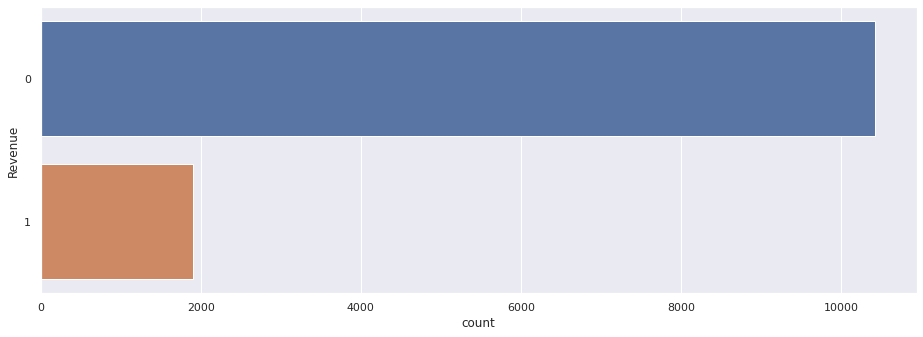

In [58]:
revenue = dataframe[["Revenue"]].astype(int)
sale_prob = revenue.mean()[0]
print("number of purchase by online customer {:.2f}%".format(sale_prob*100))
sns.countplot(y="Revenue",data=revenue)


- `Administrative`, `Administrative Duration`, `Informational`, `Informational Duration`, `Product Related`, and `Product Related Duration` represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated when a user takes an action, e.g, moving from one page to another.

Unique values: 27


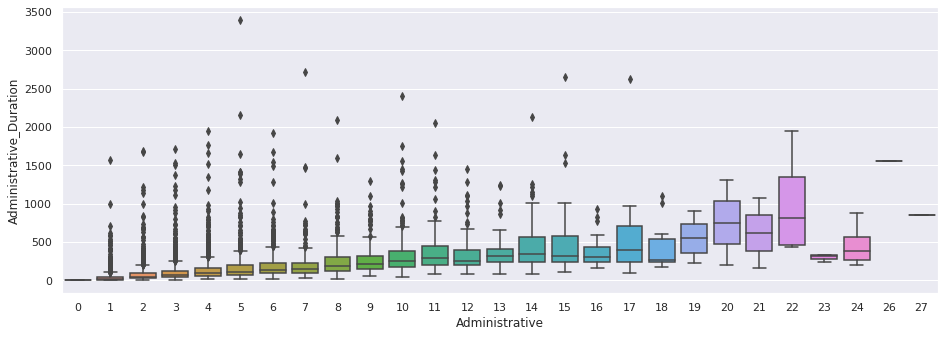

In [79]:
describe_graph("Administrative",dataframe)

Unique values: 17


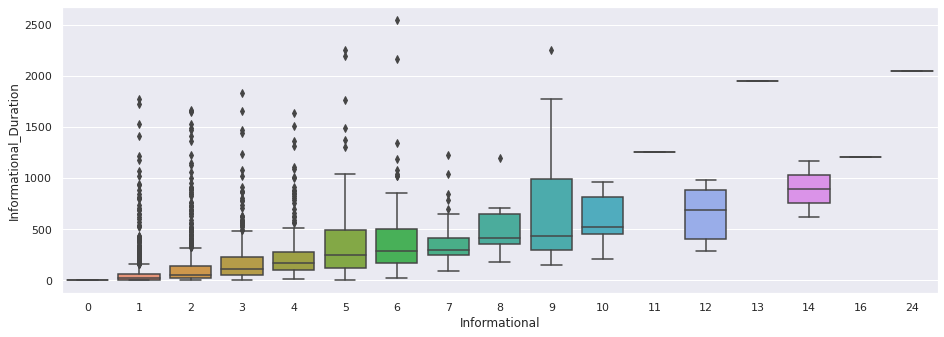

In [80]:
describe_graph("Informational",dataframe)

Unique values: 311


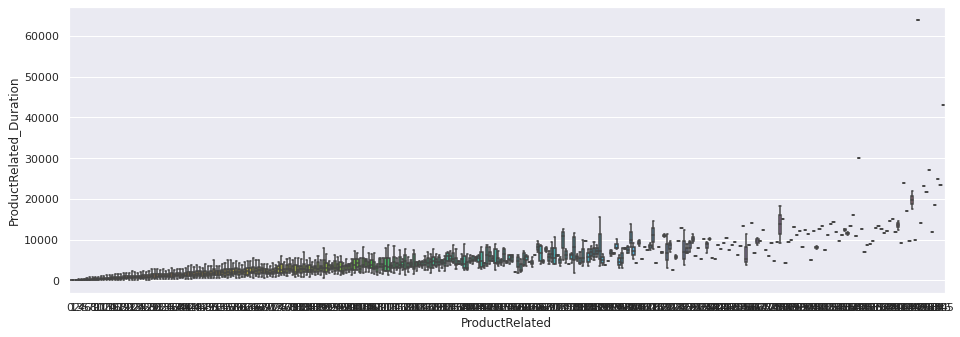

In [81]:
describe_graph("ProductRelated",dataframe,showfliers=False)

In [111]:
corr_matrix = dataframe[[
    "Administrative","Administrative_Duration"
    ,"Informational","Informational_Duration"
    ,"ProductRelated","ProductRelated_Duration"]
].corr()

<AxesSubplot:>

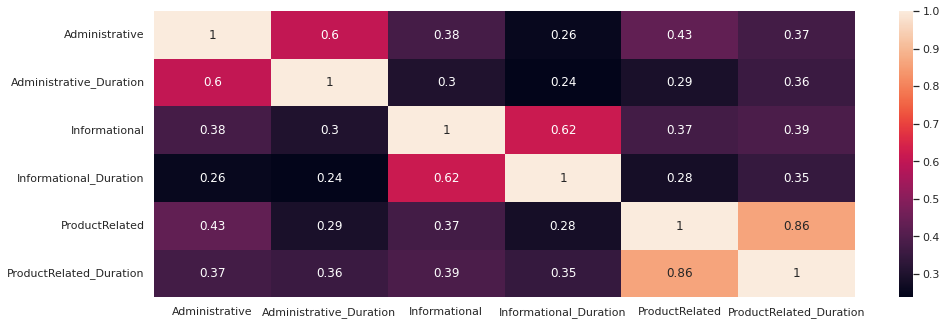

In [112]:
sns.heatmap(corr_matrix,annot=True)

Features `Bounce Rate`, `Exit Rate` and `Page Value` represent  metrics measured by Google Analytics for each page in the e-commerce site. 

- The value of `Bounce Rate` for a web page refers to the percentage of visitors who enter the site from that page and then leave (i.e., bounce) without triggering any other requests to the analytics server during that session. 

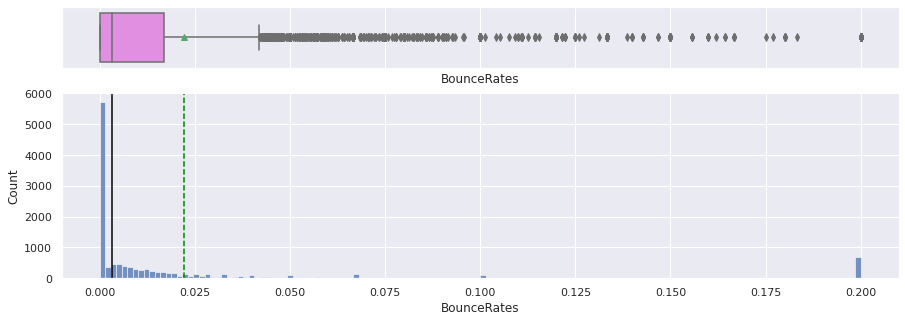

In [121]:
histogram_boxplot(dataframe["BounceRates"])

- The value of `Exit Rate` for a specific web page is calculated as for all page views to the page and it represents the percentage that the page was seen in the last session. 

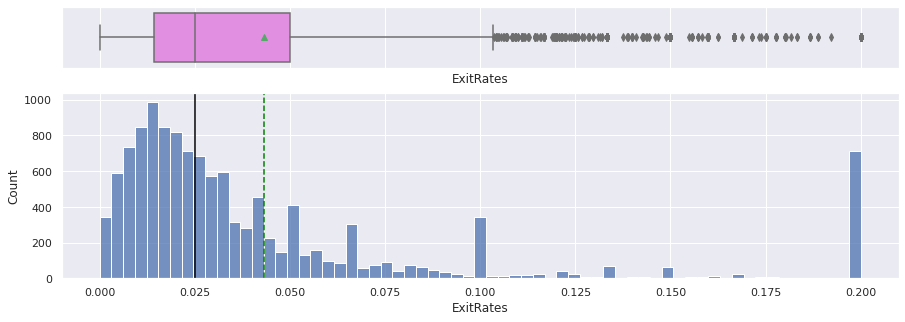

In [122]:
histogram_boxplot(dataframe["ExitRates"])

- Feature `Page Value` represents the average value for a web page that a user visited before completing an e-commerce transaction. 

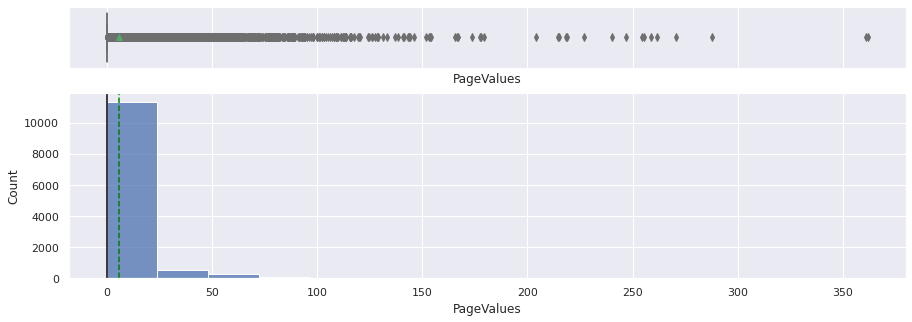

In [123]:
histogram_boxplot(dataframe["PageValues"])

- Feature `Special Day` indicates the closeness of the site visiting time to a specific special day (e.g., Mother’s Day or Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. 

In [12]:
dataframe.groupby("Month").agg({"SpecialDay":"mean"}).T

Month,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep
SpecialDay,0.0,0.0,0.233696,0.0,0.0,0.0,0.212366,0.0,0.0,0.0




- The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a boolean value indicating whether the date of the visit is weekend, and month of the year.

In [25]:
pd.DataFrame(dataframe.value_counts("Month")).T

Month,May,Nov,Mar,Dec,Oct,Sep,Aug,Jul,June,Feb
0,3364,2998,1907,1727,549,448,433,432,288,184


In [26]:
pd.DataFrame(dataframe.value_counts("VisitorType")).T

VisitorType,Returning_Visitor,New_Visitor,Other
0,10551,1694,85


In [24]:
pd.DataFrame(dataframe.value_counts("Weekend")).T

Weekend,False,True
0,9462,2868


In [4]:
dataframe.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
